In [1]:
import numpy as np

import pandas as pd

import os as o

import sys as ss

import csv as cv

import json as jayz

#import lxml as xml Not working ecen though it is installed


import requests

import sqlite3

# import sqlalchemy as sqa , not working even though installed


import re

import matplotlib.pyplot as plt

from datetime import datetime  as datetm 

from datetime import timedelta as tdel

import seaborn as sns

# Now if you want to do the plotting in pycharm, remember that no matter which method you use the figure output will
# not come unless until you write plt.show()


from io import StringIO

import pytz


In [2]:
# Time is an important structured data used in many fields such as ecology and neuroscience. Anyting that is recorded at a 
# a fixed interval forms a time series. Many time series are fixed and occur at definite interval like 15 minutes or every month
# Please note that time series can be irregular as well
# How you mark and refer the time series data depends on the application.

In [3]:
# Depending on the application you may have one of the following

# Timestamps
  # Specific instants in time

# Fixed periods
  # Such as whole month of january 2022 or entire 2023
    
# Intervals of time
  # Indicated by start and end timestamp. Periods can be thought of as special cases of intervals
    
# Experiment or elapsed time
  # Each timestamp is a measure of time relative to a particular start time starting from 0. (e.x. the diameter of a cookie
    # being baked in an oven)

In [4]:
# Now, pandas provides many built-in time series tools and algorithms. Also note that pandas supports timedelta based
# indexing that can be used to represent Experiment or elapsed time. But in this chapter our focus will be on only
# the first three topics

In [5]:
# The python standard library includes data types for date and time data. These include datetime, time and calendar
# modules

## Date and Time Data Types and Tools

In [6]:
# from datetime import datetime as datetm

right_now = datetm.now()

right_now




datetime.datetime(2023, 7, 7, 13, 1, 29, 82658)

### The output format is yyyy-mm-dd-HH-mins-sec-milisec

In [7]:
right_now.year,right_now.month,right_now.day

(2023, 7, 7)

In [8]:
right_now.date()

datetime.date(2023, 7, 7)

In [9]:
# Now, using datetime we can find the temporal difference between two timestamps

In [10]:
diff = datetm(2034,12,21) - datetm(2332,11,12,23,11)

diff

datetime.timedelta(days=-108804, seconds=2940)

In [11]:
diff_proper = datetm(2994,10,3) - datetm(2102,11,12,3,33)

diff_proper

datetime.timedelta(days=325756, seconds=73620)

In [12]:
diff_proper.days

325756

In [13]:
diff_proper.seconds

73620

In [14]:
diff_proper.min

datetime.timedelta(days=-999999999)

In [15]:
# Now, using timedelta you can add or subtract a time value to a datetime object

In [16]:
# from datetime import timedelta as tdel

In [17]:
start = datetm(2011,5,15)
start

datetime.datetime(2011, 5, 15, 0, 0)

In [18]:
start - tdel(12) # You subtracted 12 days

datetime.datetime(2011, 5, 3, 0, 0)

In [19]:
start - (3* tdel(10)) # You subtractes 30 days

datetime.datetime(2011, 4, 15, 0, 0)

In [20]:
start + tdel(20)  # You added 20 days

datetime.datetime(2011, 6, 4, 0, 0)

### 

### Converting Between String and Datetime

In [21]:
# You can parse pandas object and also datetime objects as string method using a format specification

In [22]:
stanp = datetm(3001,1,23)

stanp

datetime.datetime(3001, 1, 23, 0, 0)

In [23]:
str(stanp)

'3001-01-23 00:00:00'

In [24]:
stanp.strftime('%Y-%m-%d')

'3001-01-23'

In [25]:
# Now we can do the reverse as well i.e. converting string variable having date value to date format of datetime

In [26]:
valls = '4321-05-21'

datetm.strptime(valls,'%Y-%m-%d')

datetime.datetime(4321, 5, 21, 0, 0)

In [27]:
datestrs = ['3011/02/12','2122/12/31']

datestr_to_proper = [ datetm.strptime(z,('%Y/%m/%d'))   for z in datestrs]

datestr_to_proper

[datetime.datetime(3011, 2, 12, 0, 0), datetime.datetime(2122, 12, 31, 0, 0)]

In [28]:
# Now please note an important thing
# If you string variable has the date format of YYYY-MM-DD then, while converting to actual datetime object you will
# have to pass the format as %Y-%m-%d only you cannot convert it into a dateformat of %Y/%m/%d

In [29]:
# Now, pandas also is adept at converting data of string dates into proper datetime object, but it is more suited
# to work with array of data that could be at index or column axis

In [30]:
datestrs_pandu = ['2019-11-03 14:21:43','2020-03-01 09:00:00']

pd.to_datetime(datestrs_pandu)

DatetimeIndex(['2019-11-03 14:21:43', '2020-03-01 09:00:00'], dtype='datetime64[ns]', freq=None)

In [31]:
ik = pd.to_datetime(datestrs_pandu)

type(ik)

pandas.core.indexes.datetimes.DatetimeIndex

In [32]:
# it is also good at handling null or nan values

In [33]:
datestrs_pandu = ['2019-11-03 14:21:43','2020-03-01 09:00:00',None]

In [34]:
ikn = pd.to_datetime(datestrs_pandu)

ikn

DatetimeIndex(['2019-11-03 14:21:43', '2020-03-01 09:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [35]:
# NaT stands for Not a Time

In [36]:
ikn[2]

NaT

## Time Series Basics

In [37]:
# Now, a basic type of pandas datetime object is pandas series which is indexed by timestamps. Let's see the
# representation

In [38]:
dateless = [datetm(3100,2,1),datetm(3200,11,23),
            datetm(4001,12,31),datetm(4221,10,19),
            datetm(3342,8,29),datetm(3211,3,8)]

In [39]:
tcs = pd.Series(np.random.standard_normal(6),index=dateless)

tcs

3100-02-01 00:00:00   -0.136704
3200-11-23 00:00:00   -0.904014
4001-12-31 00:00:00   -1.509254
4221-10-19 00:00:00    0.508828
3342-08-29 00:00:00   -0.729643
3211-03-08 00:00:00    0.283172
dtype: float64

In [40]:
tcs.index

Index([3100-02-01 00:00:00, 3200-11-23 00:00:00, 4001-12-31 00:00:00,
       4221-10-19 00:00:00, 3342-08-29 00:00:00, 3211-03-08 00:00:00],
      dtype='object')

In [41]:
tcs[::2]

3100-02-01 00:00:00   -0.136704
4001-12-31 00:00:00   -1.509254
3342-08-29 00:00:00   -0.729643
dtype: float64

In [42]:
tcs + tcs[::2]

3100-02-01 00:00:00   -0.273408
3200-11-23 00:00:00         NaN
3211-03-08 00:00:00         NaN
3342-08-29 00:00:00   -1.459286
4001-12-31 00:00:00   -3.018507
4221-10-19 00:00:00         NaN
dtype: float64

In [43]:
dd = pd.Series([1,2,3,4,5],index=['a','b','d','e','g'])

dd

a    1
b    2
d    3
e    4
g    5
dtype: int64

In [44]:
sd = pd.Series([1,2,3,4,5])
sd

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [45]:
sd + dd

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
a   NaN
b   NaN
d   NaN
e   NaN
g   NaN
dtype: float64

In [46]:
tcs[0]

-0.13670407625260264

In [47]:
sd[1]

2

In [48]:
dd[1]

2

In [49]:
asd = pd.Series(['aaj','ke','partty','merti','taraf','se'])

asd

0       aaj
1        ke
2    partty
3     merti
4     taraf
5        se
dtype: object

In [50]:
sd

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [51]:
stamp_me = tcs.index[1]

stamp_me

datetime.datetime(3200, 11, 23, 0, 0)

In [52]:
# Scalar values from DatetimeIndex are pandas Timestamp object

### Indexing, Selection, Subsetting

In [53]:
stamp_me

datetime.datetime(3200, 11, 23, 0, 0)

In [54]:
tcs

3100-02-01 00:00:00   -0.136704
3200-11-23 00:00:00   -0.904014
4001-12-31 00:00:00   -1.509254
4221-10-19 00:00:00    0.508828
3342-08-29 00:00:00   -0.729643
3211-03-08 00:00:00    0.283172
dtype: float64

In [55]:
shest = tcs.index[2]

In [56]:
tcs[shest]

-1.5092536325906762

In [57]:
tcs.index

Index([3100-02-01 00:00:00, 3200-11-23 00:00:00, 4001-12-31 00:00:00,
       4221-10-19 00:00:00, 3342-08-29 00:00:00, 3211-03-08 00:00:00],
      dtype='object')

In [58]:
# tcs['3100-02-01 00:00:00']

In [59]:
daae = [datetm(2011,1,1),datetm(2011,1,4),
        datetm(2011,1,6),datetm(2011,1,8),
        datetm(2011,1,12),datetm(2011,1,21)]

In [60]:
# Now tcs_1 was created because the way of creating the index for tcs was not right apparantly. Even though you used the
# the datem keyword only still maybe due to the absurd years parsed, the unwanted HH-mm-ss attribute also came and which
# started causing key error.

tcs_1 = pd.Series(np.random.standard_normal(6),index=daae)

tcs_1

2011-01-01   -0.982458
2011-01-04   -1.379299
2011-01-06   -0.181925
2011-01-08    0.162260
2011-01-12   -1.071807
2011-01-21    1.020842
dtype: float64

In [61]:
tcs_1['2011-01-21']

1.020841687454897

In [62]:
aabe = pd.Series(np.arange(4234,4238),index=['a','b','c','d'])

aabe

a    4234
b    4235
c    4236
d    4237
dtype: int32

In [63]:
aabe[2]

4236

In [64]:
aabe['c']

4236

In [65]:
# Now, this is an interesting topic. Suppose your dataframe has dates ranging for multiple years. Well you can
# just select a particular date range just by passing an year or an year and month value.

In [66]:
long_tcs = pd.Series(np.random.standard_normal(1000),
                     index=pd.date_range('2050-01-10',periods=1000)
                    )

long_tcs

2050-01-10    1.370852
2050-01-11   -0.387727
2050-01-12   -0.860304
2050-01-13   -1.315340
2050-01-14    2.119461
                ...   
2052-10-01    1.669606
2052-10-02    0.446869
2052-10-03   -0.884171
2052-10-04    2.624826
2052-10-05   -1.058618
Freq: D, Length: 1000, dtype: float64

In [67]:
long_tcs['2051']

2051-01-01   -0.257707
2051-01-02    2.042323
2051-01-03   -0.262502
2051-01-04   -0.902018
2051-01-05    1.372238
                ...   
2051-12-27    0.902827
2051-12-28    0.835443
2051-12-29   -1.442109
2051-12-30   -0.449411
2051-12-31    0.274479
Freq: D, Length: 365, dtype: float64

In [68]:
# Now you can go with even further specification

In [69]:
long_tcs['2051-01']

2051-01-01   -0.257707
2051-01-02    2.042323
2051-01-03   -0.262502
2051-01-04   -0.902018
2051-01-05    1.372238
2051-01-06    0.632395
2051-01-07    0.959468
2051-01-08   -0.072713
2051-01-09   -0.362862
2051-01-10    0.763130
2051-01-11   -1.595738
2051-01-12   -1.151386
2051-01-13    0.057364
2051-01-14   -1.451025
2051-01-15   -1.820609
2051-01-16   -1.703123
2051-01-17    1.012867
2051-01-18   -2.303026
2051-01-19    0.485584
2051-01-20    0.304268
2051-01-21   -0.532971
2051-01-22    0.091090
2051-01-23   -0.689934
2051-01-24   -0.312561
2051-01-25    0.230318
2051-01-26   -0.302763
2051-01-27   -1.006172
2051-01-28   -0.151670
2051-01-29   -0.812645
2051-01-30    1.750697
2051-01-31    0.338530
Freq: D, dtype: float64

In [70]:
# Now you can also do the slicing without using loc or iloc or any other traditional method

In [71]:
tcs_1[datetm(2011,1,21):]

2011-01-21    1.020842
dtype: float64

In [72]:
tcs_1[datetm(2011,1,1):datetm(2011,1,12)]

2011-01-01   -0.982458
2011-01-04   -1.379299
2011-01-06   -0.181925
2011-01-08    0.162260
2011-01-12   -1.071807
dtype: float64

In [73]:
tcs_1

2011-01-01   -0.982458
2011-01-04   -1.379299
2011-01-06   -0.181925
2011-01-08    0.162260
2011-01-12   -1.071807
2011-01-21    1.020842
dtype: float64

In [74]:
# Now, since MOST of the time the time series data is usually present in chronological order. You can perform
# slicing with the date data that is not even present in the series. Have a look below

In [75]:
tcs_1

2011-01-01   -0.982458
2011-01-04   -1.379299
2011-01-06   -0.181925
2011-01-08    0.162260
2011-01-12   -1.071807
2011-01-21    1.020842
dtype: float64

In [76]:
tcs_1['2010-01-11':'2022-11-23']

2011-01-01   -0.982458
2011-01-04   -1.379299
2011-01-06   -0.181925
2011-01-08    0.162260
2011-01-12   -1.071807
2011-01-21    1.020842
dtype: float64

In [77]:
# Now as usual the above logic of slicing works with other objects like date,datetime and timeseries.

In [78]:
# Now let's see an interesting method of truncating data

In [79]:
tcs_1.truncate(after='2011-01-08')

2011-01-01   -0.982458
2011-01-04   -1.379299
2011-01-06   -0.181925
2011-01-08    0.162260
dtype: float64

In [80]:
tcs_1 # original is unaffected

2011-01-01   -0.982458
2011-01-04   -1.379299
2011-01-06   -0.181925
2011-01-08    0.162260
2011-01-12   -1.071807
2011-01-21    1.020842
dtype: float64

#### All that we have studied regarding datetime,time and timestamp combo with series now applies to DataFrame also as it is

In [81]:
dates_df = pd.date_range('1993-08-12',periods=100,freq='W-WED')

dates_df

DatetimeIndex(['1993-08-18', '1993-08-25', '1993-09-01', '1993-09-08',
               '1993-09-15', '1993-09-22', '1993-09-29', '1993-10-06',
               '1993-10-13', '1993-10-20', '1993-10-27', '1993-11-03',
               '1993-11-10', '1993-11-17', '1993-11-24', '1993-12-01',
               '1993-12-08', '1993-12-15', '1993-12-22', '1993-12-29',
               '1994-01-05', '1994-01-12', '1994-01-19', '1994-01-26',
               '1994-02-02', '1994-02-09', '1994-02-16', '1994-02-23',
               '1994-03-02', '1994-03-09', '1994-03-16', '1994-03-23',
               '1994-03-30', '1994-04-06', '1994-04-13', '1994-04-20',
               '1994-04-27', '1994-05-04', '1994-05-11', '1994-05-18',
               '1994-05-25', '1994-06-01', '1994-06-08', '1994-06-15',
               '1994-06-22', '1994-06-29', '1994-07-06', '1994-07-13',
               '1994-07-20', '1994-07-27', '1994-08-03', '1994-08-10',
               '1994-08-17', '1994-08-24', '1994-08-31', '1994-09-07',
      

In [82]:
long_df = pd.DataFrame(np.random.standard_normal((100,4)),
                      index=dates_df,columns=['ek','do','teen','chaar'])

long_df

,ek,do,teen,chaar
1993-08-18,0.931343,0.008367,-0.568177,1.577206
1993-08-25,0.332544,-0.877237,-0.034190,0.772304
1993-09-01,-0.815144,0.312574,-0.181537,0.579566
1993-09-08,-0.509248,0.776031,-0.688341,-0.217681
1993-09-15,-0.199267,-1.296521,0.157317,0.217395
...,...,...,...,...
1995-06-14,0.732155,-0.172107,-1.697998,-1.282225
1995-06-21,1.727886,0.908338,0.964898,0.304956
1995-06-28,-0.141003,0.747208,-0.143357,0.831760
1995-07-05,-0.531889,0.105222,0.840981,-0.006611


In [83]:
long_df.loc['1994']

,ek,do,teen,chaar
1994-01-05,1.138831,0.153511,1.894386,0.221205
1994-01-12,0.026583,1.706067,1.853520,-0.301609
1994-01-19,0.699453,0.511532,-0.805296,0.497028
1994-01-26,1.459601,-1.979576,0.069217,0.079496
1994-02-02,0.077714,-0.071863,0.951800,0.686996
1994-02-09,0.400529,-0.532283,0.873309,-1.732563
1994-02-16,0.558827,-0.631692,-2.744177,-0.672680
1994-02-23,0.734465,2.225348,-1.324534,-1.372034
1994-03-02,-0.312623,0.250989,1.245655,-0.417092
1994-03-09,-0.790493,-0.531631,-0.227116,-1.273155


In [84]:
# You can use without loc also but it will be removed in future, so it's best to stay future proof

In [85]:
long_df['1994']

c:\python 3.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,ek,do,teen,chaar
1994-01-05,1.138831,0.153511,1.894386,0.221205
1994-01-12,0.026583,1.706067,1.853520,-0.301609
1994-01-19,0.699453,0.511532,-0.805296,0.497028
1994-01-26,1.459601,-1.979576,0.069217,0.079496
1994-02-02,0.077714,-0.071863,0.951800,0.686996
1994-02-09,0.400529,-0.532283,0.873309,-1.732563
1994-02-16,0.558827,-0.631692,-2.744177,-0.672680
1994-02-23,0.734465,2.225348,-1.324534,-1.372034
1994-03-02,-0.312623,0.250989,1.245655,-0.417092
1994-03-09,-0.790493,-0.531631,-0.227116,-1.273155


### Time Series with Duplicate Indices

In [86]:
# In some application there may be multiple data observations falling on a particular timestamp

In [87]:
date_dup = pd.DatetimeIndex(['2122-01-02','2122-02-02',
                          '2122-02-02','2122-02-02',
                          '2122-03-12'])

date_dup

DatetimeIndex(['2122-01-02', '2122-02-02', '2122-02-02', '2122-02-02',
               '2122-03-12'],
              dtype='datetime64[ns]', freq=None)

In [88]:
dup_ser = pd.Series(np.arange(5),index=date_dup)

dup_ser

2122-01-02    0
2122-02-02    1
2122-02-02    2
2122-02-02    3
2122-03-12    4
dtype: int32

In [89]:
# We can tell if the index is unique or not by checking the is_unique property

In [90]:
dup_ser.index.is_unique

False

In [91]:
# Now selecting data from this series will either produce scalar values or a slice output depending on the whether the
# data that has been selected is duplicate or not

In [92]:
dup_ser

2122-01-02    0
2122-02-02    1
2122-02-02    2
2122-02-02    3
2122-03-12    4
dtype: int32

In [93]:
dup_ser['2122-03-12']

4

In [94]:
dup_ser['2122-02-02']

2122-02-02    1
2122-02-02    2
2122-02-02    3
dtype: int32

In [95]:
# Suppose you wanted to aggregate over data having non-unique value, then you can do this by using the groupby function
# and passing the level as 0(in our case we can only pass 0 since our example is a series)

In [96]:
groupped = dup_ser.groupby(level=0)

In [97]:
groupped.mean()

2122-01-02    0
2122-02-02    2
2122-03-12    4
dtype: int32

In [98]:
groupped.count()

2122-01-02    1
2122-02-02    3
2122-03-12    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [99]:
# Now, we have seen till now that the generic data in time series is usually irregular. But that is ok, still there are 
# times when we need regularised data with fixed frequency, so for that there are many pandas function which we will see
# below 

In [100]:
tcs

3100-02-01 00:00:00   -0.136704
3200-11-23 00:00:00   -0.904014
4001-12-31 00:00:00   -1.509254
4221-10-19 00:00:00    0.508828
3342-08-29 00:00:00   -0.729643
3211-03-08 00:00:00    0.283172
dtype: float64

In [101]:
tcs_1

2011-01-01   -0.982458
2011-01-04   -1.379299
2011-01-06   -0.181925
2011-01-08    0.162260
2011-01-12   -1.071807
2011-01-21    1.020842
dtype: float64

In [102]:
resamplee = tcs_1.resample('D')

In [103]:
resamplee

In [104]:
tcs_1

2011-01-01   -0.982458
2011-01-04   -1.379299
2011-01-06   -0.181925
2011-01-08    0.162260
2011-01-12   -1.071807
2011-01-21    1.020842
dtype: float64

In [105]:
dfc = pd.DatetimeIndex(['2122-01-02','2122-02-02',
                          '2122-05-12','2122-04-19',
                          '2122-03-12'])

dfc

DatetimeIndex(['2122-01-02', '2122-02-02', '2122-05-12', '2122-04-19',
               '2122-03-12'],
              dtype='datetime64[ns]', freq=None)

In [106]:
chec = pd.Series(np.arange(5),index=dfc)

chec

2122-01-02    0
2122-02-02    1
2122-05-12    2
2122-04-19    3
2122-03-12    4
dtype: int32

In [107]:
check = chec.resample('D')

In [108]:
check

In [109]:
chec

2122-01-02    0
2122-02-02    1
2122-05-12    2
2122-04-19    3
2122-03-12    4
dtype: int32

### Generating Date Ranges

In [110]:
# Now, in this section we are going to see how the date_range function works to create DateTime index

In [111]:
my_ind= pd.date_range('2036-01-03','2039-03-30')

my_ind

DatetimeIndex(['2036-01-03', '2036-01-04', '2036-01-05', '2036-01-06',
               '2036-01-07', '2036-01-08', '2036-01-09', '2036-01-10',
               '2036-01-11', '2036-01-12',
               ...
               '2039-03-21', '2039-03-22', '2039-03-23', '2039-03-24',
               '2039-03-25', '2039-03-26', '2039-03-27', '2039-03-28',
               '2039-03-29', '2039-03-30'],
              dtype='datetime64[ns]', length=1183, freq='D')

In [112]:
# Now, by default date_range generates only daily timestamps. Now, in the below ex if you do not pass the periods still
# it will work and produce daily timestamp. However if you pass only the start or end attribute then, passing the 
# periods attribute becomes manadatory

In [113]:
md = pd.date_range('2036-01-03','2036-03-30',periods=4)

md

DatetimeIndex(['2036-01-03', '2036-02-01', '2036-03-01', '2036-03-30'], dtype='datetime64[ns]', freq=None)

In [114]:
md_1 = pd.date_range('2036-01-03','2036-03-30')

md_1

DatetimeIndex(['2036-01-03', '2036-01-04', '2036-01-05', '2036-01-06',
               '2036-01-07', '2036-01-08', '2036-01-09', '2036-01-10',
               '2036-01-11', '2036-01-12', '2036-01-13', '2036-01-14',
               '2036-01-15', '2036-01-16', '2036-01-17', '2036-01-18',
               '2036-01-19', '2036-01-20', '2036-01-21', '2036-01-22',
               '2036-01-23', '2036-01-24', '2036-01-25', '2036-01-26',
               '2036-01-27', '2036-01-28', '2036-01-29', '2036-01-30',
               '2036-01-31', '2036-02-01', '2036-02-02', '2036-02-03',
               '2036-02-04', '2036-02-05', '2036-02-06', '2036-02-07',
               '2036-02-08', '2036-02-09', '2036-02-10', '2036-02-11',
               '2036-02-12', '2036-02-13', '2036-02-14', '2036-02-15',
               '2036-02-16', '2036-02-17', '2036-02-18', '2036-02-19',
               '2036-02-20', '2036-02-21', '2036-02-22', '2036-02-23',
               '2036-02-24', '2036-02-25', '2036-02-26', '2036-02-27',
      

In [115]:
md_start = pd.date_range(start='2000-01-23',periods=12)
md_start

# Note that if the date value that you are passing is the start date then you can skip writing the start parameter because
# by default date_range considers it as start only
# pd.date_range(start='2000-01-23',periods=12) is same as pd.date_range('2000-01-23',periods=12)




DatetimeIndex(['2000-01-23', '2000-01-24', '2000-01-25', '2000-01-26',
               '2000-01-27', '2000-01-28', '2000-01-29', '2000-01-30',
               '2000-01-31', '2000-02-01', '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [116]:
md_end = pd.date_range(end='1922-12-16',periods=100)

md_end

DatetimeIndex(['1922-09-08', '1922-09-09', '1922-09-10', '1922-09-11',
               '1922-09-12', '1922-09-13', '1922-09-14', '1922-09-15',
               '1922-09-16', '1922-09-17', '1922-09-18', '1922-09-19',
               '1922-09-20', '1922-09-21', '1922-09-22', '1922-09-23',
               '1922-09-24', '1922-09-25', '1922-09-26', '1922-09-27',
               '1922-09-28', '1922-09-29', '1922-09-30', '1922-10-01',
               '1922-10-02', '1922-10-03', '1922-10-04', '1922-10-05',
               '1922-10-06', '1922-10-07', '1922-10-08', '1922-10-09',
               '1922-10-10', '1922-10-11', '1922-10-12', '1922-10-13',
               '1922-10-14', '1922-10-15', '1922-10-16', '1922-10-17',
               '1922-10-18', '1922-10-19', '1922-10-20', '1922-10-21',
               '1922-10-22', '1922-10-23', '1922-10-24', '1922-10-25',
               '1922-10-26', '1922-10-27', '1922-10-28', '1922-10-29',
               '1922-10-30', '1922-10-31', '1922-11-01', '1922-11-02',
      

In [117]:
# Now, you can pass an even better filter like printing the business end day of the month

In [118]:
md_bm = pd.date_range('2011-02-01','2012-03-30',freq='BM')

md_bm

DatetimeIndex(['2011-02-28', '2011-03-31', '2011-04-29', '2011-05-31',
               '2011-06-30', '2011-07-29', '2011-08-31', '2011-09-30',
               '2011-10-31', '2011-11-30', '2011-12-30', '2012-01-31',
               '2012-02-29', '2012-03-30'],
              dtype='datetime64[ns]', freq='BM')

In [119]:
# Now, pandas preserves the timestamp to the last minute

In [120]:
sd = pd.date_range('2001-03-21 12:23:21',periods=21)

sd


DatetimeIndex(['2001-03-21 12:23:21', '2001-03-22 12:23:21',
               '2001-03-23 12:23:21', '2001-03-24 12:23:21',
               '2001-03-25 12:23:21', '2001-03-26 12:23:21',
               '2001-03-27 12:23:21', '2001-03-28 12:23:21',
               '2001-03-29 12:23:21', '2001-03-30 12:23:21',
               '2001-03-31 12:23:21', '2001-04-01 12:23:21',
               '2001-04-02 12:23:21', '2001-04-03 12:23:21',
               '2001-04-04 12:23:21', '2001-04-05 12:23:21',
               '2001-04-06 12:23:21', '2001-04-07 12:23:21',
               '2001-04-08 12:23:21', '2001-04-09 12:23:21',
               '2001-04-10 12:23:21'],
              dtype='datetime64[ns]', freq='D')

In [121]:
# Now, there might be times when you will have a timestamp value with seconds. However, you might wanna generate
# the remaining time stamp on a normal basis without the HH:mm:ss value. For that use normalized

In [122]:
normal = pd.date_range('2101-03-21 12:23:21',periods=21,normalize=True)
normal

DatetimeIndex(['2101-03-21', '2101-03-22', '2101-03-23', '2101-03-24',
               '2101-03-25', '2101-03-26', '2101-03-27', '2101-03-28',
               '2101-03-29', '2101-03-30', '2101-03-31', '2101-04-01',
               '2101-04-02', '2101-04-03', '2101-04-04', '2101-04-05',
               '2101-04-06', '2101-04-07', '2101-04-08', '2101-04-09',
               '2101-04-10'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [123]:
# Now, in pandas frequencies are composed of a base frequency and a multiplier. For monthly frequency data the alias is
# is "M" for hourly it is "H". The frequency can be referred by the date offset. So hourly frequency can be referred by
# hour class

In [124]:
from pandas.tseries.offsets import Hour,Minute

In [125]:
hour = Hour()

In [126]:
hour

<Hour>

In [127]:
# You can define multiple of an offset by passing an integer:


In [128]:
four_hour = Hour(4)

In [129]:
four_hour

<4 * Hours>

In [130]:
# Now, you can do the same without creating these aliases as well

In [131]:
pd.date_range('2000-01-12','2001-01-13',freq='4H')

DatetimeIndex(['2000-01-12 00:00:00', '2000-01-12 04:00:00',
               '2000-01-12 08:00:00', '2000-01-12 12:00:00',
               '2000-01-12 16:00:00', '2000-01-12 20:00:00',
               '2000-01-13 00:00:00', '2000-01-13 04:00:00',
               '2000-01-13 08:00:00', '2000-01-13 12:00:00',
               ...
               '2001-01-11 12:00:00', '2001-01-11 16:00:00',
               '2001-01-11 20:00:00', '2001-01-12 00:00:00',
               '2001-01-12 04:00:00', '2001-01-12 08:00:00',
               '2001-01-12 12:00:00', '2001-01-12 16:00:00',
               '2001-01-12 20:00:00', '2001-01-13 00:00:00'],
              dtype='datetime64[ns]', length=2203, freq='4H')

In [132]:
# Many offsets can be combined by addition itself

In [133]:
Hour(23) + Minute(230)

<1610 * Minutes>

In [134]:
# One more way for doing it

In [135]:
pd.date_range('2010-10-21',periods=10,freq='1h30min')

DatetimeIndex(['2010-10-21 00:00:00', '2010-10-21 01:30:00',
               '2010-10-21 03:00:00', '2010-10-21 04:30:00',
               '2010-10-21 06:00:00', '2010-10-21 07:30:00',
               '2010-10-21 09:00:00', '2010-10-21 10:30:00',
               '2010-10-21 12:00:00', '2010-10-21 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [136]:
# one more useful frequency class is 'week of month'

In [137]:
monthly_weekend_list = pd.date_range('2023-01-23','2023-12-30',freq='WOM-4FRI')

monthly_weekend_list

DatetimeIndex(['2023-01-27', '2023-02-24', '2023-03-24', '2023-04-28',
               '2023-05-26', '2023-06-23', '2023-07-28', '2023-08-25',
               '2023-09-22', '2023-10-27', '2023-11-24', '2023-12-22'],
              dtype='datetime64[ns]', freq='WOM-4FRI')

In [138]:
hate_monday_list = pd.date_range('2023-01-23','2023-12-30',freq='WOM-1MON')

hate_monday_list

DatetimeIndex(['2023-02-06', '2023-03-06', '2023-04-03', '2023-05-01',
               '2023-06-05', '2023-07-03', '2023-08-07', '2023-09-04',
               '2023-10-02', '2023-11-06', '2023-12-04'],
              dtype='datetime64[ns]', freq='WOM-1MON')

### Shifting (Leading and Lagging ) Data

In [139]:
# Shifting refers to moving data backwards or forwards without affecting the index. Obviously if index is not
# modified then it simply means that missing data is introduced

In [140]:
tshift = pd.Series(np.random.standard_normal(4),index=pd.date_range('2000-12-12',periods=4,freq='M'))

tshift

2000-12-31   -0.880414
2001-01-31    1.765097
2001-02-28    0.436496
2001-03-31    0.123098
Freq: M, dtype: float64

In [141]:
tshift.shift(2)

2000-12-31         NaN
2001-01-31         NaN
2001-02-28   -0.880414
2001-03-31    1.765097
Freq: M, dtype: float64

In [142]:
tshift.shift(-2)

2000-12-31    0.436496
2001-01-31    0.123098
2001-02-28         NaN
2001-03-31         NaN
Freq: M, dtype: float64

In [143]:
# shifts are mostly used for calculating consecutive computing changes

In [144]:
tshift/tshift.shift(-1)

2000-12-31   -0.498790
2001-01-31    4.043791
2001-02-28    3.545914
2001-03-31         NaN
Freq: M, dtype: float64

In [145]:
# Now, this way of shifting seems pretty useless. So a better way is to pass the freq parameter in shift so that
# it can modify the index as well.

In [146]:
tshift

2000-12-31   -0.880414
2001-01-31    1.765097
2001-02-28    0.436496
2001-03-31    0.123098
Freq: M, dtype: float64

In [147]:
tshift.shift(2,'M')

2001-02-28   -0.880414
2001-03-31    1.765097
2001-04-30    0.436496
2001-05-31    0.123098
Freq: M, dtype: float64

In [148]:
tshift.shift(-2,'M')

2000-10-31   -0.880414
2000-11-30    1.765097
2000-12-31    0.436496
2001-01-31    0.123098
Freq: M, dtype: float64

In [149]:
tshift.shift(2,'D')

2001-01-02   -0.880414
2001-02-02    1.765097
2001-03-02    0.436496
2001-04-02    0.123098
dtype: float64

In [150]:
tshift.shift(2,'90T')

2000-12-31 03:00:00   -0.880414
2001-01-31 03:00:00    1.765097
2001-02-28 03:00:00    0.436496
2001-03-31 03:00:00    0.123098
dtype: float64

In [151]:
tshift

2000-12-31   -0.880414
2001-01-31    1.765097
2001-02-28    0.436496
2001-03-31    0.123098
Freq: M, dtype: float64

#### Shifting dates with offsets

In [152]:
# Now, here we will use datetime and timestamp objects for timeshifting

In [153]:
from pandas.tseries.offsets import Day,MonthEnd

In [154]:
now = datetm(2023,6,21)

now

datetime.datetime(2023, 6, 21, 0, 0)

In [155]:
now + 3*Day() # it will move it ahead by 3 days

Timestamp('2023-06-24 00:00:00')

In [156]:
# Now, let's see the use of MonthEnd.

In [157]:
now + MonthEnd()

Timestamp('2023-06-30 00:00:00')

In [158]:
# Now, as you can see above is that our day was 2023,6,21. However, after using MonthEnd it WENT straight to the 
# monthend of the current month

In [159]:
now + MonthEnd(3)

Timestamp('2023-08-31 00:00:00')

In [160]:
# Now, using new methods

In [161]:
offsetter = MonthEnd()

In [162]:
offsetter.rollforward(now) # So here basically we used the MonthEnd's object only and used the rollforward method

Timestamp('2023-06-30 00:00:00')

In [163]:
offsetter.rollback(now)

Timestamp('2023-05-31 00:00:00')

In [164]:
# Now we will see an interesting use of Monthend i.e. with groupby functions

In [165]:
tshift_grp = pd.Series(np.random.standard_normal(20), index=pd.date_range('2021-02-11',periods=20,freq='5D'))

tshift_grp

2021-02-11    0.694205
2021-02-16    0.442992
2021-02-21    1.034988
2021-02-26    0.104428
2021-03-03   -0.671987
2021-03-08   -2.151001
2021-03-13    1.029590
2021-03-18   -1.471011
2021-03-23    0.035228
2021-03-28    0.796827
2021-04-02   -0.055007
2021-04-07   -1.554643
2021-04-12    0.344090
2021-04-17    0.963079
2021-04-22   -0.927660
2021-04-27   -0.057981
2021-05-02   -0.328054
2021-05-07    0.595682
2021-05-12    0.570533
2021-05-17   -0.846074
Freq: 5D, dtype: float64

In [166]:
tshift_grp.groupby(MonthEnd().rollforward).mean() # Here basically we have plotted the mean values of the months to the
# last day of the specific month

2021-02-28    0.569153
2021-03-31   -0.405392
2021-04-30   -0.214687
2021-05-31   -0.001978
dtype: float64

## Time zone handling

In [167]:
pytz.common_timezones



['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

###  Important note we can only use tz when making an object of pytz. Nothing else works

In [168]:
tz = pytz.timezone("America/New_York")

tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [169]:
no_shit = pytz.timezone('America/New_York')

no_shit

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [170]:
# Now, all the daterange based index objects like series and DataFrame till now were actually time zone naive. That
# means that they did not pertain to any particular regions timezone.

In [171]:
date_me = pd.date_range('2012-03-09 10:20',periods=6)

date_me

DatetimeIndex(['2012-03-09 10:20:00', '2012-03-10 10:20:00',
               '2012-03-11 10:20:00', '2012-03-12 10:20:00',
               '2012-03-13 10:20:00', '2012-03-14 10:20:00'],
              dtype='datetime64[ns]', freq='D')

In [172]:
ams_ser = pd.Series(np.random.standard_normal(len(date_me)),index=date_me)

ams_ser

2012-03-09 10:20:00   -0.204586
2012-03-10 10:20:00   -0.311158
2012-03-11 10:20:00    0.304706
2012-03-12 10:20:00   -1.577667
2012-03-13 10:20:00    1.803187
2012-03-14 10:20:00    1.538181
Freq: D, dtype: float64

In [173]:
# Now, this series does not have any time zone, you can check the same as below

In [174]:
print(ams_ser.index.tz) 

None


In [175]:
print(ams_ser.index)

DatetimeIndex(['2012-03-09 10:20:00', '2012-03-10 10:20:00',
               '2012-03-11 10:20:00', '2012-03-12 10:20:00',
               '2012-03-13 10:20:00', '2012-03-14 10:20:00'],
              dtype='datetime64[ns]', freq='D')


In [176]:
# Now we will see how to generate ranges with time zone set

In [177]:
pd.date_range('2011-03-30',periods=10,freq='5H',tz = 'UTC')

DatetimeIndex(['2011-03-30 00:00:00+00:00', '2011-03-30 05:00:00+00:00',
               '2011-03-30 10:00:00+00:00', '2011-03-30 15:00:00+00:00',
               '2011-03-30 20:00:00+00:00', '2011-03-31 01:00:00+00:00',
               '2011-03-31 06:00:00+00:00', '2011-03-31 11:00:00+00:00',
               '2011-03-31 16:00:00+00:00', '2011-03-31 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='5H')

In [178]:
# Now, you can localize the time zone

In [179]:
ams_ser


2012-03-09 10:20:00   -0.204586
2012-03-10 10:20:00   -0.311158
2012-03-11 10:20:00    0.304706
2012-03-12 10:20:00   -1.577667
2012-03-13 10:20:00    1.803187
2012-03-14 10:20:00    1.538181
Freq: D, dtype: float64

In [180]:
ams_ser_utc = ams_ser.tz_localize('UTC')

ams_ser_utc

2012-03-09 10:20:00+00:00   -0.204586
2012-03-10 10:20:00+00:00   -0.311158
2012-03-11 10:20:00+00:00    0.304706
2012-03-12 10:20:00+00:00   -1.577667
2012-03-13 10:20:00+00:00    1.803187
2012-03-14 10:20:00+00:00    1.538181
Freq: D, dtype: float64

In [181]:
ams_ser_utc.index

DatetimeIndex(['2012-03-09 10:20:00+00:00', '2012-03-10 10:20:00+00:00',
               '2012-03-11 10:20:00+00:00', '2012-03-12 10:20:00+00:00',
               '2012-03-13 10:20:00+00:00', '2012-03-14 10:20:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [182]:
# Now once the timezone has been localized we can convert that particular timezone.

In [183]:

ams_ser_utc.tz_convert('Europe/Amsterdam')

2012-03-09 11:20:00+01:00   -0.204586
2012-03-10 11:20:00+01:00   -0.311158
2012-03-11 11:20:00+01:00    0.304706
2012-03-12 11:20:00+01:00   -1.577667
2012-03-13 11:20:00+01:00    1.803187
2012-03-14 11:20:00+01:00    1.538181
Freq: D, dtype: float64

In [184]:
ams_ser.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 10:20:00+08:00', '2012-03-10 10:20:00+08:00',
               '2012-03-11 10:20:00+08:00', '2012-03-12 10:20:00+08:00',
               '2012-03-13 10:20:00+08:00', '2012-03-14 10:20:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone-Aware Timestamp Objects

In [185]:
# Now, just like Series and dateranges the Timestamp objects can also be converted to local timezones and UTC

In [186]:
stamp = pd.Timestamp('2011-02-12 16:00')

stamp

Timestamp('2011-02-12 16:00:00')

#### Note that you have to localize before the conversion

In [187]:
stamp_utc = stamp.tz_localize('utc')

stamp_utc

Timestamp('2011-02-12 16:00:00+0000', tz='UTC')

In [188]:
stamp_utc.tz_convert('Europe/Amsterdam')

Timestamp('2011-02-12 17:00:00+0100', tz='Europe/Amsterdam')

In [189]:
# Now you can also pass the timezone while creating the timestamp

In [190]:
stamp_ams = pd.Timestamp('2023-08-20 23:21',tz='Europe/Amsterdam')

stamp_ams

Timestamp('2023-08-20 23:21:00+0200', tz='Europe/Amsterdam')

In [191]:
# Now all UTC stores a timestamp value in nanoseconds since the epoch of 1 January 1970

In [192]:
stamp_ams.value

1692566460000000000

In [193]:
# Now we will see that pandas does not alter the DST values while changing from Day to night. Did'nt understand this part
# that well. Also it's just not that important.

In [194]:
stamp_respect = pd.Timestamp('2013-11-02 01:20',tz='US/Eastern')

stamp_respect

Timestamp('2013-11-02 01:20:00-0400', tz='US/Eastern')

In [195]:
stamp_respect + Hour()

Timestamp('2013-11-02 02:20:00-0400', tz='US/Eastern')

In [196]:
# Now we will just transition out of DST

In [197]:
stamp_out = pd.Timestamp('2012-12-22 00:20',tz='US/Eastern')

stamp_out

Timestamp('2012-12-22 00:20:00-0500', tz='US/Eastern')

In [198]:
stamp_out + 2 * Hour()

Timestamp('2012-12-22 02:20:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [199]:
# Now, if two time series of different time zones are combined, then the result will be UTC

In [200]:
Khajur = pd.date_range('2212-12-03 12:22',periods=10,freq='BM')

Khajur

DatetimeIndex(['2212-12-31 12:22:00', '2213-01-29 12:22:00',
               '2213-02-26 12:22:00', '2213-03-31 12:22:00',
               '2213-04-30 12:22:00', '2213-05-31 12:22:00',
               '2213-06-30 12:22:00', '2213-07-30 12:22:00',
               '2213-08-31 12:22:00', '2213-09-30 12:22:00'],
              dtype='datetime64[ns]', freq='BM')

In [201]:
test = pd.Series(np.random.standard_normal(len(Khajur)),index=Khajur)

test

2212-12-31 12:22:00    2.973664
2213-01-29 12:22:00   -1.003438
2213-02-26 12:22:00    0.124446
2213-03-31 12:22:00   -1.631367
2213-04-30 12:22:00   -0.165210
2213-05-31 12:22:00   -0.204337
2213-06-30 12:22:00   -0.440652
2213-07-30 12:22:00   -0.479156
2213-08-31 12:22:00    2.094624
2213-09-30 12:22:00   -0.089695
Freq: BM, dtype: float64

In [202]:
tt1 = test[:7].tz_localize('Europe/Amsterdam')
tt1

2212-12-31 12:22:00+01:00    2.973664
2213-01-29 12:22:00+01:00   -1.003438
2213-02-26 12:22:00+01:00    0.124446
2213-03-31 12:22:00+01:00   -1.631367
2213-04-30 12:22:00+01:00   -0.165210
2213-05-31 12:22:00+01:00   -0.204337
2213-06-30 12:22:00+01:00   -0.440652
dtype: float64

In [203]:
tt2 = tt1[2:].tz_convert('America/New_York')

tt2

2213-02-26 06:22:00-05:00    0.124446
2213-03-31 06:22:00-05:00   -1.631367
2213-04-30 06:22:00-05:00   -0.165210
2213-05-31 06:22:00-05:00   -0.204337
2213-06-30 06:22:00-05:00   -0.440652
dtype: float64

In [204]:
resullt = tt1 + tt2

resullt

2212-12-31 11:22:00+00:00         NaN
2213-01-29 11:22:00+00:00         NaN
2213-02-26 11:22:00+00:00    0.248893
2213-03-31 11:22:00+00:00   -3.262733
2213-04-30 11:22:00+00:00   -0.330420
2213-05-31 11:22:00+00:00   -0.408673
2213-06-30 11:22:00+00:00   -0.881304
dtype: float64

In [205]:
resullt.index

DatetimeIndex(['2212-12-31 11:22:00+00:00', '2213-01-29 11:22:00+00:00',
               '2213-02-26 11:22:00+00:00', '2213-03-31 11:22:00+00:00',
               '2213-04-30 11:22:00+00:00', '2213-05-31 11:22:00+00:00',
               '2213-06-30 11:22:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Periods and Period Arithmetic

In [206]:
# Now, periods is a little more like exclusive form of time/data representation rather than a generalized time span

In [207]:
ps = pd.Period('1997',freq='A-DEC')

ps

Period('1997', 'A-DEC')

In [208]:
# now the ps in this case represents full time span from 1 january 1997 to 31 December 1997 inclusive

In [209]:
# we can perform integer operations as well on them which will shift their frequency

In [210]:
ps + 44

Period('2041', 'A-DEC')

In [211]:
ps - 23

Period('1974', 'A-DEC')

In [212]:
# if two periods have the same frequency, then the difference is the number of units between them as a date offset

In [213]:
ps1 = pd.Period('1992','A-DEC')

ps1

Period('1992', 'A-DEC')

In [214]:
ps - ps1

<5 * YearEnds: month=12>

In [215]:
ps1 - ps

<-5 * YearEnds: month=12>

In [216]:
# Regular ranges of periods can be constructed with period_range function

In [217]:
period_me = pd.period_range('2000-11-02','2012-12-10',freq='M')

period_me

PeriodIndex(['2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04',
             '2001-05', '2001-06', '2001-07', '2001-08',
             ...
             '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08',
             '2012-09', '2012-10', '2012-11', '2012-12'],
            dtype='period[M]', length=146, freq='M')

In [218]:
# We can use these date_ranges as index as well

In [219]:
period_ind = pd.Series(np.random.standard_normal(len(period_me)),index=period_me)

period_ind

2000-11   -1.564685
2000-12   -0.622986
2001-01   -1.325732
2001-02   -1.162528
2001-03   -2.110459
             ...   
2012-08   -1.805426
2012-09    1.468438
2012-10    0.373582
2012-11   -1.406675
2012-12   -0.916461
Freq: M, Length: 146, dtype: float64

In [220]:
# if you have string values you can use the PeriodIndex class where all the values are periods

In [221]:
vals = ['2001Q4','2012Q1','2003Q2']

In [222]:
indexer = pd.PeriodIndex(vals,freq='Q-DEC')

indexer

PeriodIndex(['2001Q4', '2012Q1', '2003Q2'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [223]:
# You can convert Periods and PeriodIndex objects to another frequency using the asfreq method

In [224]:
p = pd.Period('2001',freq='A-DEC')

p

Period('2001', 'A-DEC')

In [225]:
p.asfreq('M',how = 'start')

Period('2001-01', 'M')

In [226]:
p.asfreq('M',how = 'end')

Period('2001-12', 'M')

In [227]:
p.asfreq('M')

Period('2001-12', 'M')

In [228]:
# Now, if you start a year midway then the corresponding monthly subperiods are different

In [229]:
p = pd.Period('2011',freq='A-JUN')

p

Period('2011', 'A-JUN')

In [230]:
p.asfreq('M',how = 'start')

Period('2010-07', 'M')

In [231]:
p.asfreq('M',how = 'end')

Period('2011-06', 'M')

In [232]:
# Now if you are converting a month that is higher in the calendar order meaning like May is higher than April.
# Then in such scenarios pandas will determine the subperiods depending on where it belongs

In [233]:
p = pd.Period('Aug-2011','M')
p

Period('2011-08', 'M')

In [234]:
p.asfreq('A-JUN')

Period('2012', 'A-JUN')

In [235]:
# So here you can see that you went from a higher period of august of 2011 to Jun and pandas automatically put it in
# the june of 2012 rather than june of 2011

In [236]:
# Now similarly entire PeriodIndex objects or time series can be similarly converted with same semantics

In [237]:
periodse = pd.period_range('2001','2012',freq='A-DEC')

periodse

PeriodIndex(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
             '2009', '2010', '2011', '2012'],
            dtype='period[A-DEC]', freq='A-DEC')

In [238]:
time_me = pd.Series(np.random.standard_normal(len(periodse)),index=periodse)

time_me

2001   -0.306780
2002   -1.683075
2003   -2.139890
2004   -0.028421
2005    1.237962
2006   -0.180708
2007    0.614889
2008   -0.728205
2009   -0.341321
2010    0.368344
2011   -1.579163
2012   -1.075883
Freq: A-DEC, dtype: float64

In [239]:
time_me.asfreq('M',how='start')

2001-01   -0.306780
2002-01   -1.683075
2003-01   -2.139890
2004-01   -0.028421
2005-01    1.237962
2006-01   -0.180708
2007-01    0.614889
2008-01   -0.728205
2009-01   -0.341321
2010-01    0.368344
2011-01   -1.579163
2012-01   -1.075883
Freq: M, dtype: float64

In [240]:
# If you want the business end date then do as follows

In [241]:
time_me.asfreq('B')

2001-12-31   -0.306780
2002-12-31   -1.683075
2003-12-31   -2.139890
2004-12-31   -0.028421
2005-12-30    1.237962
2006-12-29   -0.180708
2007-12-31    0.614889
2008-12-31   -0.728205
2009-12-31   -0.341321
2010-12-31    0.368344
2011-12-30   -1.579163
2012-12-31   -1.075883
Freq: B, dtype: float64

In [242]:
time_me.asfreq('B',how='start')

2001-01-01   -0.306780
2002-01-01   -1.683075
2003-01-01   -2.139890
2004-01-01   -0.028421
2005-01-03    1.237962
2006-01-02   -0.180708
2007-01-01    0.614889
2008-01-01   -0.728205
2009-01-01   -0.341321
2010-01-01    0.368344
2011-01-03   -1.579163
2012-01-02   -1.075883
Freq: B, dtype: float64

### Quaterly Period Frequencies

In [243]:
# Now,learning the processing of quaterly data is extremely important as each business works on quaterly basis

In [244]:
pp = pd.Period('2022Q3',freq='Q-JUN')

pp

Period('2022Q3', 'Q-JUN')

In [245]:
# Now to check where it starts at

In [246]:
pp.asfreq('D',how = 'start')

Period('2022-01-01', 'D')

In [247]:
pp.asfreq('D',how = 'end')

Period('2022-03-31', 'D')

In [248]:
# Suppose you have to do period arithmetic like the time-stamp at 4 P.M. on the second to last business day of the 
# quater. So you do

In [249]:
pp4pm = (pp.asfreq('B',how = 'end')-1).asfreq('T',how='start') + 16 * 60

pp4pm

Period('2022-03-30 16:00', 'T')

In [250]:
pp4pm.to_timestamp()

Timestamp('2022-03-30 16:00:00')

In [251]:
# Ofcourse you can generate quaterly ranges using period_ranges

In [252]:
periods = pd.period_range('2012Q2','2022Q4',freq='Q-JUL')

periods

PeriodIndex(['2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3',
             '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1',
             '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
             '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3',
             '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1',
             '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3',
             '2022Q4'],
            dtype='period[Q-JUL]', freq='Q-JUL')

In [253]:
tsme = pd.Series(np.random.standard_normal(len(periods)),index=periods)

tsme

2012Q2    0.425611
2012Q3   -0.807032
2012Q4   -1.163952
2013Q1   -1.616590
2013Q2    0.118654
2013Q3    0.134218
2013Q4    0.813473
2014Q1    1.114542
2014Q2    0.048352
2014Q3   -1.951205
2014Q4   -2.267851
2015Q1   -0.434971
2015Q2    0.394862
2015Q3   -1.237824
2015Q4   -0.400220
2016Q1    0.717419
2016Q2   -1.030479
2016Q3   -1.200193
2016Q4   -0.933797
2017Q1   -0.116630
2017Q2    0.068576
2017Q3    0.772693
2017Q4    0.639035
2018Q1   -0.946681
2018Q2   -0.185823
2018Q3   -1.492190
2018Q4    0.547226
2019Q1    1.312993
2019Q2   -2.061445
2019Q3    1.104864
2019Q4    1.292067
2020Q1    1.895276
2020Q2   -0.135043
2020Q3    0.790802
2020Q4   -0.449047
2021Q1    0.675279
2021Q2    0.298934
2021Q3    2.550673
2021Q4   -0.401586
2022Q1    0.845102
2022Q2    0.276856
2022Q3   -2.001220
2022Q4    0.690928
Freq: Q-JUL, dtype: float64

In [254]:
new_periods = (periods.asfreq('B',how='end') - 12).asfreq('H',how='start') + 32

new_periods

PeriodIndex(['2012-01-14 08:00', '2012-04-13 08:00', '2012-07-14 08:00',
             '2012-10-16 08:00', '2013-01-16 08:00', '2013-04-13 08:00',
             '2013-07-16 08:00', '2013-10-16 08:00', '2014-01-16 08:00',
             '2014-04-15 08:00', '2014-07-16 08:00', '2014-10-16 08:00',
             '2015-01-15 08:00', '2015-04-15 08:00', '2015-07-16 08:00',
             '2015-10-15 08:00', '2016-01-14 08:00', '2016-04-14 08:00',
             '2016-07-14 08:00', '2016-10-14 08:00', '2017-01-14 08:00',
             '2017-04-13 08:00', '2017-07-14 08:00', '2017-10-14 08:00',
             '2018-01-16 08:00', '2018-04-13 08:00', '2018-07-14 08:00',
             '2018-10-16 08:00', '2019-01-16 08:00', '2019-04-13 08:00',
             '2019-07-16 08:00', '2019-10-16 08:00', '2020-01-16 08:00',
             '2020-04-15 08:00', '2020-07-16 08:00', '2020-10-15 08:00',
             '2021-01-14 08:00', '2021-04-15 08:00', '2021-07-15 08:00',
             '2021-10-14 08:00', '2022-01-14 08:00'

In [255]:
tsme.index  = new_periods.to_timestamp()

In [256]:
tsme

2012-01-14 08:00:00    0.425611
2012-04-13 08:00:00   -0.807032
2012-07-14 08:00:00   -1.163952
2012-10-16 08:00:00   -1.616590
2013-01-16 08:00:00    0.118654
2013-04-13 08:00:00    0.134218
2013-07-16 08:00:00    0.813473
2013-10-16 08:00:00    1.114542
2014-01-16 08:00:00    0.048352
2014-04-15 08:00:00   -1.951205
2014-07-16 08:00:00   -2.267851
2014-10-16 08:00:00   -0.434971
2015-01-15 08:00:00    0.394862
2015-04-15 08:00:00   -1.237824
2015-07-16 08:00:00   -0.400220
2015-10-15 08:00:00    0.717419
2016-01-14 08:00:00   -1.030479
2016-04-14 08:00:00   -1.200193
2016-07-14 08:00:00   -0.933797
2016-10-14 08:00:00   -0.116630
2017-01-14 08:00:00    0.068576
2017-04-13 08:00:00    0.772693
2017-07-14 08:00:00    0.639035
2017-10-14 08:00:00   -0.946681
2018-01-16 08:00:00   -0.185823
2018-04-13 08:00:00   -1.492190
2018-07-14 08:00:00    0.547226
2018-10-16 08:00:00    1.312993
2019-01-16 08:00:00   -2.061445
2019-04-13 08:00:00    1.104864
2019-07-16 08:00:00    1.292067
2019-10-

### Creating timestamps to periods(and Back)

In [257]:
# Series and DataFrame objects with timestamp as indexes can be converted into indexes with periods

In [258]:
dates = pd.date_range('2001-11-2',periods=3,freq='M')

dates

DatetimeIndex(['2001-11-30', '2001-12-31', '2002-01-31'], dtype='datetime64[ns]', freq='M')

In [259]:
check = pd.Series(np.random.standard_normal(len(dates)),index=dates)

check

2001-11-30   -0.982745
2001-12-31   -0.297482
2002-01-31   -0.538516
Freq: M, dtype: float64

In [260]:
check_c = check.to_period()

check_c

2001-11   -0.982745
2001-12   -0.297482
2002-01   -0.538516
Freq: M, dtype: float64

In [261]:
# Now, even if you have duplicate indexes it's not an issue

In [262]:
new_date = pd.date_range('2001-02-27',periods=7,freq='B')

new_date

DatetimeIndex(['2001-02-27', '2001-02-28', '2001-03-01', '2001-03-02',
               '2001-03-05', '2001-03-06', '2001-03-07'],
              dtype='datetime64[ns]', freq='B')

In [263]:
serial = pd.Series(np.random.standard_normal(len(new_date)),index=new_date)

serial

2001-02-27    0.947800
2001-02-28    0.819038
2001-03-01   -0.407847
2001-03-02   -0.268217
2001-03-05   -0.618834
2001-03-06   -2.094936
2001-03-07    0.468894
Freq: B, dtype: float64

In [264]:
serial.to_period('M')

2001-02    0.947800
2001-02    0.819038
2001-03   -0.407847
2001-03   -0.268217
2001-03   -0.618834
2001-03   -2.094936
2001-03    0.468894
Freq: M, dtype: float64

In [265]:
serial.to_period()

2001-02-27    0.947800
2001-02-28    0.819038
2001-03-01   -0.407847
2001-03-02   -0.268217
2001-03-05   -0.618834
2001-03-06   -2.094936
2001-03-07    0.468894
Freq: B, dtype: float64

In [266]:
# Now, you can convert the periods back to timestamp 

In [267]:
neue = serial.to_period()

In [268]:
neue

2001-02-27    0.947800
2001-02-28    0.819038
2001-03-01   -0.407847
2001-03-02   -0.268217
2001-03-05   -0.618834
2001-03-06   -2.094936
2001-03-07    0.468894
Freq: B, dtype: float64

In [269]:
neue.to_timestamp(how='end')

2001-02-27 23:59:59.999999999    0.947800
2001-02-28 23:59:59.999999999    0.819038
2001-03-01 23:59:59.999999999   -0.407847
2001-03-02 23:59:59.999999999   -0.268217
2001-03-05 23:59:59.999999999   -0.618834
2001-03-06 23:59:59.999999999   -2.094936
2001-03-07 23:59:59.999999999    0.468894
dtype: float64

### Creating a PeriodicIndex from Arrays

In [270]:
# In case of large datasets time span information is stored in multiple columns. As we will see in the below example 
# where the year and the quarter are in different columns

In [271]:
fdata = pd.read_csv('examples/macrodata.csv')

fdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [272]:
print(o.getcwd())

C:\Users\manas\PycharmProjects\wes mckinney


In [273]:
fdata['year']

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [274]:
fdata['quarter']

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [275]:
# Now, you can combine these columns to form an index.

In [276]:
fdata_index = pd.PeriodIndex(year = fdata['year'],quarter = fdata['quarter'],
                            freq='Q-DEC')

# imp note you cannot use any other thing in place of (year)<-- this = fdata['year'] in this type of code and
# similarly for this quarter = fdata['quarter'] as well

In [277]:
fdata_index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [278]:
fdata.index = fdata_index

In [279]:
fdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


## Resampling and Frequency Conversion

In [280]:
# Resampling as it sounds means the conversion of a time series from one frequency to another.
# Converting a time series of a high frequency data to a lower one means downsampling
# Similarly converting a data from lower frequency to a higher one is upsampling
# Not every conversion can be called as upsample or downsample like converting a frequency of W-WED that is 
# weekly on wednesday to W-FRI meaning weekly on Friday is neither upsampling or downsampling

In [281]:
# pandas has a very useful resample method for this

In [282]:
mydats = pd.date_range('2001-12-17',periods=199)

mydats

DatetimeIndex(['2001-12-17', '2001-12-18', '2001-12-19', '2001-12-20',
               '2001-12-21', '2001-12-22', '2001-12-23', '2001-12-24',
               '2001-12-25', '2001-12-26',
               ...
               '2002-06-24', '2002-06-25', '2002-06-26', '2002-06-27',
               '2002-06-28', '2002-06-29', '2002-06-30', '2002-07-01',
               '2002-07-02', '2002-07-03'],
              dtype='datetime64[ns]', length=199, freq='D')

In [283]:
resampser = pd.Series(np.random.standard_normal(len(mydats)),index=mydats)

resampser

2001-12-17    1.596480
2001-12-18    1.581178
2001-12-19   -0.050405
2001-12-20    0.819671
2001-12-21   -0.878363
                ...   
2002-06-29    0.218078
2002-06-30    1.162297
2002-07-01    0.614701
2002-07-02    0.129104
2002-07-03    1.471784
Freq: D, Length: 199, dtype: float64

In [284]:
resampser.resample('H').mean()

2001-12-17 00:00:00    1.596480
2001-12-17 01:00:00         NaN
2001-12-17 02:00:00         NaN
2001-12-17 03:00:00         NaN
2001-12-17 04:00:00         NaN
                         ...   
2002-07-02 20:00:00         NaN
2002-07-02 21:00:00         NaN
2002-07-02 22:00:00         NaN
2002-07-02 23:00:00         NaN
2002-07-03 00:00:00    1.471784
Freq: H, Length: 4753, dtype: float64

In [285]:
resampser.resample('M',kind='period').mean()

2001-12    1.003502
2002-01   -0.193250
2002-02    0.052928
2002-03    0.049539
2002-04   -0.163256
2002-05   -0.089284
2002-06   -0.140777
2002-07    0.738530
Freq: M, dtype: float64

### Downsampling

In [286]:
# Now, downsampling is converting a data of more samples or higher samples to a regularized or lower frequency
# ex:- suppose you have a data of monthly frequencies and you wish to convert them to an yearly frequency so by doing this
# you are converting a data that has more samples to a lower sampled data

In [287]:
# Now when doing downsampling intervals of the samples are decided based on the frequency that you pass
#    Which side of the interval is closed
#    how to label each aggregated bin, either with the start of the interval or the end


In [288]:

# Now, let's see an example

In [289]:
ndat = pd.date_range('2212-03-22',periods=29,freq='T')

ndat

DatetimeIndex(['2212-03-22 00:00:00', '2212-03-22 00:01:00',
               '2212-03-22 00:02:00', '2212-03-22 00:03:00',
               '2212-03-22 00:04:00', '2212-03-22 00:05:00',
               '2212-03-22 00:06:00', '2212-03-22 00:07:00',
               '2212-03-22 00:08:00', '2212-03-22 00:09:00',
               '2212-03-22 00:10:00', '2212-03-22 00:11:00',
               '2212-03-22 00:12:00', '2212-03-22 00:13:00',
               '2212-03-22 00:14:00', '2212-03-22 00:15:00',
               '2212-03-22 00:16:00', '2212-03-22 00:17:00',
               '2212-03-22 00:18:00', '2212-03-22 00:19:00',
               '2212-03-22 00:20:00', '2212-03-22 00:21:00',
               '2212-03-22 00:22:00', '2212-03-22 00:23:00',
               '2212-03-22 00:24:00', '2212-03-22 00:25:00',
               '2212-03-22 00:26:00', '2212-03-22 00:27:00',
               '2212-03-22 00:28:00'],
              dtype='datetime64[ns]', freq='T')

In [290]:
# Now, suppose you want to convert this data into three-minute chunks

In [291]:
tsdn = pd.Series(np.random.standard_normal(len(ndat)),index=ndat)

tsdn

2212-03-22 00:00:00    1.482532
2212-03-22 00:01:00   -0.176822
2212-03-22 00:02:00   -0.976262
2212-03-22 00:03:00   -0.330437
2212-03-22 00:04:00   -0.987180
2212-03-22 00:05:00    0.314758
2212-03-22 00:06:00   -0.226646
2212-03-22 00:07:00    1.427484
2212-03-22 00:08:00    1.353628
2212-03-22 00:09:00   -0.622736
2212-03-22 00:10:00    0.061710
2212-03-22 00:11:00   -1.279674
2212-03-22 00:12:00   -0.334583
2212-03-22 00:13:00   -0.185777
2212-03-22 00:14:00    0.926520
2212-03-22 00:15:00    0.738868
2212-03-22 00:16:00   -0.900070
2212-03-22 00:17:00    0.992187
2212-03-22 00:18:00    0.189903
2212-03-22 00:19:00    0.244588
2212-03-22 00:20:00   -1.257916
2212-03-22 00:21:00    0.610673
2212-03-22 00:22:00    1.292899
2212-03-22 00:23:00   -0.008233
2212-03-22 00:24:00    1.329167
2212-03-22 00:25:00   -0.427257
2212-03-22 00:26:00   -1.296895
2212-03-22 00:27:00   -0.208376
2212-03-22 00:28:00   -0.243363
Freq: T, dtype: float64

In [292]:
tsdn.resample('3min').sum()

# Now, in this case the default process is that the left end is inclusive hence as you can see that the right most data
# of 28 min was not included in the resample

2212-03-22 00:00:00    0.329447
2212-03-22 00:03:00   -1.002859
2212-03-22 00:06:00    2.554466
2212-03-22 00:09:00   -1.840699
2212-03-22 00:12:00    0.406161
2212-03-22 00:15:00    0.830986
2212-03-22 00:18:00   -0.823425
2212-03-22 00:21:00    1.895340
2212-03-22 00:24:00   -0.394984
2212-03-22 00:27:00   -0.451739
Freq: 3T, dtype: float64

In [293]:
tsdn.resample('3min',closed='right').sum() # Now, here although you have passed closed = right still the 28th minute timestamp
# is not included, hence we pass the label attribute in the below cell for complete inclusion

2212-03-21 23:57:00    1.482532
2212-03-22 00:00:00   -1.483521
2212-03-22 00:03:00   -0.899068
2212-03-22 00:06:00    2.158377
2212-03-22 00:09:00   -1.552546
2212-03-22 00:12:00    1.479612
2212-03-22 00:15:00    0.282021
2212-03-22 00:18:00   -0.402655
2212-03-22 00:21:00    2.613834
2212-03-22 00:24:00   -1.932527
2212-03-22 00:27:00   -0.243363
Freq: 3T, dtype: float64

In [294]:
tsdn.resample('3min',closed='right',label='right').sum()

2212-03-22 00:00:00    1.482532
2212-03-22 00:03:00   -1.483521
2212-03-22 00:06:00   -0.899068
2212-03-22 00:09:00    2.158377
2212-03-22 00:12:00   -1.552546
2212-03-22 00:15:00    1.479612
2212-03-22 00:18:00    0.282021
2212-03-22 00:21:00   -0.402655
2212-03-22 00:24:00    2.613834
2212-03-22 00:27:00   -1.932527
2212-03-22 00:30:00   -0.243363
Freq: 3T, dtype: float64

In [295]:
# Now, here are some beautifying tricks to make the data more presentable as in to make it more clear as to which
# interval does the timestamp refer to

In [296]:
from pandas.tseries.frequencies import to_offset as toffee

In [297]:
new_res = tsdn.resample('3min',closed='right',label='right').sum()

In [298]:
new_res

2212-03-22 00:00:00    1.482532
2212-03-22 00:03:00   -1.483521
2212-03-22 00:06:00   -0.899068
2212-03-22 00:09:00    2.158377
2212-03-22 00:12:00   -1.552546
2212-03-22 00:15:00    1.479612
2212-03-22 00:18:00    0.282021
2212-03-22 00:21:00   -0.402655
2212-03-22 00:24:00    2.613834
2212-03-22 00:27:00   -1.932527
2212-03-22 00:30:00   -0.243363
Freq: 3T, dtype: float64

In [299]:
new_res.index = new_res.index + toffee('-1s')

In [300]:
new_res

2212-03-21 23:59:59    1.482532
2212-03-22 00:02:59   -1.483521
2212-03-22 00:05:59   -0.899068
2212-03-22 00:08:59    2.158377
2212-03-22 00:11:59   -1.552546
2212-03-22 00:14:59    1.479612
2212-03-22 00:17:59    0.282021
2212-03-22 00:20:59   -0.402655
2212-03-22 00:23:59    2.613834
2212-03-22 00:26:59   -1.932527
2212-03-22 00:29:59   -0.243363
Freq: 3T, dtype: float64

#### Open-high-low-close (OHLC) resampling

In [301]:
# Now, usually for a time series it is pretty useful to compute the 4 values of opening, closing, lowest and highest value.
# this can be done with the help of a single function

In [302]:
tsohlc = pd.Series(np.random.permutation(np.arange(len(ndat))),index=ndat)

tsohlc

2212-03-22 00:00:00    10
2212-03-22 00:01:00    22
2212-03-22 00:02:00     5
2212-03-22 00:03:00    16
2212-03-22 00:04:00    23
2212-03-22 00:05:00    24
2212-03-22 00:06:00     1
2212-03-22 00:07:00     2
2212-03-22 00:08:00     6
2212-03-22 00:09:00    17
2212-03-22 00:10:00    12
2212-03-22 00:11:00    21
2212-03-22 00:12:00     7
2212-03-22 00:13:00     8
2212-03-22 00:14:00    27
2212-03-22 00:15:00    13
2212-03-22 00:16:00    14
2212-03-22 00:17:00     0
2212-03-22 00:18:00    28
2212-03-22 00:19:00    15
2212-03-22 00:20:00    26
2212-03-22 00:21:00    19
2212-03-22 00:22:00    25
2212-03-22 00:23:00     4
2212-03-22 00:24:00    20
2212-03-22 00:25:00     9
2212-03-22 00:26:00    11
2212-03-22 00:27:00    18
2212-03-22 00:28:00     3
Freq: T, dtype: int32

In [303]:
tsohlc.resample('3min').ohlc()

,open,high,low,close
2212-03-22 00:00:00,10,22,5,5
2212-03-22 00:03:00,16,24,16,24
2212-03-22 00:06:00,1,6,1,6
2212-03-22 00:09:00,17,21,12,21
2212-03-22 00:12:00,7,27,7,27
2212-03-22 00:15:00,13,14,0,0
2212-03-22 00:18:00,28,28,15,26
2212-03-22 00:21:00,19,25,4,4
2212-03-22 00:24:00,20,20,9,11
2212-03-22 00:27:00,18,18,3,3


### Upsampling and Interpolation

In [304]:
framed = pd.DataFrame(np.random.standard_normal((2,4)),index=pd.date_range('2222-02-22',freq='W-WED',periods=2),
                     columns=['pehlla','dusra','teesra','chautha'])

framed

,pehlla,dusra,teesra,chautha
2222-02-27,-0.272879,-1.333232,0.299501,1.387897
2222-03-06,1.737430,-1.754307,0.420940,-0.961027


In [305]:
# Now, if you want to upsample this data or do aggregation then it will lead to introduction of NA values

In [306]:
framed.resample('24H').asfreq()

,pehlla,dusra,teesra,chautha
2222-02-27,-0.272879,-1.333232,0.299501,1.387897
2222-02-28,NaN,NaN,NaN,NaN
2222-03-01,NaN,NaN,NaN,NaN
2222-03-02,NaN,NaN,NaN,NaN
2222-03-03,NaN,NaN,NaN,NaN
2222-03-04,NaN,NaN,NaN,NaN
2222-03-05,NaN,NaN,NaN,NaN
2222-03-06,1.737430,-1.754307,0.420940,-0.961027


In [307]:
# Now, you can fill these values by using the pandas' filling and interpolation methods for resampling

In [308]:
framed.resample('D').ffill()

,pehlla,dusra,teesra,chautha
2222-02-27,-0.272879,-1.333232,0.299501,1.387897
2222-02-28,-0.272879,-1.333232,0.299501,1.387897
2222-03-01,-0.272879,-1.333232,0.299501,1.387897
2222-03-02,-0.272879,-1.333232,0.299501,1.387897
2222-03-03,-0.272879,-1.333232,0.299501,1.387897
2222-03-04,-0.272879,-1.333232,0.299501,1.387897
2222-03-05,-0.272879,-1.333232,0.299501,1.387897
2222-03-06,1.737430,-1.754307,0.420940,-0.961027


In [309]:
# similarly you can also set the limit till the values should fill

In [310]:
framed.resample('D').ffill(limit=4)

,pehlla,dusra,teesra,chautha
2222-02-27,-0.272879,-1.333232,0.299501,1.387897
2222-02-28,-0.272879,-1.333232,0.299501,1.387897
2222-03-01,-0.272879,-1.333232,0.299501,1.387897
2222-03-02,-0.272879,-1.333232,0.299501,1.387897
2222-03-03,-0.272879,-1.333232,0.299501,1.387897
2222-03-04,NaN,NaN,NaN,NaN
2222-03-05,NaN,NaN,NaN,NaN
2222-03-06,1.737430,-1.754307,0.420940,-0.961027


### Resampling with Periods

In [311]:
# Resampling with data with index as periods is similar to resampling with normal indexed data

In [312]:
framres = pd.DataFrame(np.random.standard_normal((24,4)),
                      index= pd.period_range('2000-01','2001-12',freq='M'),
                      columns=['ek','do','teen','chaar'])

framres

,ek,do,teen,chaar
2000-01,0.884230,-0.381188,-0.742184,-1.158319
2000-02,-1.811665,-0.345194,-0.887032,1.707497
2000-03,-0.325145,-0.806570,-1.220062,-0.623296
2000-04,2.014163,-0.442290,-1.722649,-0.723374
2000-05,-1.280846,1.559960,0.604084,-0.941983
2000-06,-0.701250,0.435625,0.391406,-0.510367
2000-07,-0.414497,1.158232,-0.505682,-0.363133
2000-08,0.629696,-0.733700,1.391448,0.161085
2000-09,0.055928,0.157079,-0.629195,0.554578
2000-10,-2.229476,-1.907648,0.348354,-0.132386


In [313]:
annualframres = framres.resample('A-DEC').mean()

In [314]:
# Now, when upsampling this data based on quaterly values, it is important to use the fill function and also to state
# where you want to place the new values i.e in start or end. Default is start

In [315]:
annualframres.resample('Q-DEC').mean()
# quaterly year ending in december
# It is decided by pandas in default which month will belong in which quarter

,ek,do,teen,chaar
2000Q1,-0.275640,-0.041014,-0.093961,-0.141570
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.058973,0.379336,-0.097026,0.021543
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [316]:
annualframres.resample('Q-DEC').ffill()

,ek,do,teen,chaar
2000Q1,-0.275640,-0.041014,-0.093961,-0.141570
2000Q2,-0.275640,-0.041014,-0.093961,-0.141570
2000Q3,-0.275640,-0.041014,-0.093961,-0.141570
2000Q4,-0.275640,-0.041014,-0.093961,-0.141570
2001Q1,0.058973,0.379336,-0.097026,0.021543
2001Q2,0.058973,0.379336,-0.097026,0.021543
2001Q3,0.058973,0.379336,-0.097026,0.021543
2001Q4,0.058973,0.379336,-0.097026,0.021543


In [317]:
annualframres.resample('Q-DEC',convention='end').asfreq()

,ek,do,teen,chaar
2000Q4,-0.275640,-0.041014,-0.093961,-0.141570
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.058973,0.379336,-0.097026,0.021543


In [318]:
annualframres.resample('Q-MAR').mean()

,ek,do,teen,chaar
2000Q4,-0.275640,-0.041014,-0.093961,-0.141570
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.058973,0.379336,-0.097026,0.021543
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,NaN,NaN,NaN,NaN


In [319]:
annualframres.resample('Q-JUN').mean()

,ek,do,teen,chaar
2000Q3,-0.275640,-0.041014,-0.093961,-0.141570
2000Q4,NaN,NaN,NaN,NaN
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,0.058973,0.379336,-0.097026,0.021543
2001Q4,NaN,NaN,NaN,NaN
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN


In [320]:
annualframres.resample('Q-SEP').mean()

,ek,do,teen,chaar
2000Q2,-0.275640,-0.041014,-0.093961,-0.141570
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,NaN,NaN,NaN,NaN
2001Q2,0.058973,0.379336,-0.097026,0.021543
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN
2002Q1,NaN,NaN,NaN,NaN


In [321]:
# There are two important rules to understand with upsampling and downsampling

#### In downsampling the target frequency must be a subperiod of the source frequency
#### In upsampling the target frequency must be a subperiod of the source frequency

In [322]:
# annualframres.resample('Q-APR').mean()

# Now this will throw an error as this does not belong to start or end of any quarter
# this is because if you use Q-DEC or Q-MAR then it will only line up with A-MAR, A-JUN, A-SEP and A-DEC

In [323]:
annualframres.resample('Q-MAR').ffill()

,ek,do,teen,chaar
2000Q4,-0.275640,-0.041014,-0.093961,-0.141570
2001Q1,-0.275640,-0.041014,-0.093961,-0.141570
2001Q2,-0.275640,-0.041014,-0.093961,-0.141570
2001Q3,-0.275640,-0.041014,-0.093961,-0.141570
2001Q4,0.058973,0.379336,-0.097026,0.021543
2002Q1,0.058973,0.379336,-0.097026,0.021543
2002Q2,0.058973,0.379336,-0.097026,0.021543
2002Q3,0.058973,0.379336,-0.097026,0.021543


In [324]:
annualframres.resample('A-MAR').ffill()

,ek,do,teen,chaar
2000,-0.275640,-0.041014,-0.093961,-0.141570
2001,0.058973,0.379336,-0.097026,0.021543
2002,0.058973,0.379336,-0.097026,0.021543


### Grouped Time Resampling

In [325]:
# Now for pandas object that have time series data, resample is more like a group operation based on time
# intervalization

In [326]:
N = 15

timer = pd.date_range('2000-02-12 00:00:00',freq='1min',periods=N)

timer

DatetimeIndex(['2000-02-12 00:00:00', '2000-02-12 00:01:00',
               '2000-02-12 00:02:00', '2000-02-12 00:03:00',
               '2000-02-12 00:04:00', '2000-02-12 00:05:00',
               '2000-02-12 00:06:00', '2000-02-12 00:07:00',
               '2000-02-12 00:08:00', '2000-02-12 00:09:00',
               '2000-02-12 00:10:00', '2000-02-12 00:11:00',
               '2000-02-12 00:12:00', '2000-02-12 00:13:00',
               '2000-02-12 00:14:00'],
              dtype='datetime64[ns]', freq='T')

In [327]:
dfs = pd.DataFrame({'times':timer,'vallu':np.arange(N)})

dfs

,times,vallu
0,2000-02-12 00:00:00,0
1,2000-02-12 00:01:00,1
2,2000-02-12 00:02:00,2
3,2000-02-12 00:03:00,3
4,2000-02-12 00:04:00,4
5,2000-02-12 00:05:00,5
6,2000-02-12 00:06:00,6
7,2000-02-12 00:07:00,7
8,2000-02-12 00:08:00,8
9,2000-02-12 00:09:00,9


In [328]:
nedfs = dfs.set_index('times')

print(dfs)

nedfs

                 times  vallu
0  2000-02-12 00:00:00      0
1  2000-02-12 00:01:00      1
2  2000-02-12 00:02:00      2
3  2000-02-12 00:03:00      3
4  2000-02-12 00:04:00      4
5  2000-02-12 00:05:00      5
6  2000-02-12 00:06:00      6
7  2000-02-12 00:07:00      7
8  2000-02-12 00:08:00      8
9  2000-02-12 00:09:00      9
10 2000-02-12 00:10:00     10
11 2000-02-12 00:11:00     11
12 2000-02-12 00:12:00     12
13 2000-02-12 00:13:00     13
14 2000-02-12 00:14:00     14


,vallu
times,
2000-02-12 00:00:00,0
2000-02-12 00:01:00,1
2000-02-12 00:02:00,2
2000-02-12 00:03:00,3
2000-02-12 00:04:00,4
2000-02-12 00:05:00,5
2000-02-12 00:06:00,6
2000-02-12 00:07:00,7
2000-02-12 00:08:00,8


In [329]:
# dfs.resample('5min') Now you can't do set_index and resample separatly because set_index does not change the original 
# dataframe

In [330]:
nedfs.resample('5min').count()

,vallu
times,
2000-02-12 00:00:00,5
2000-02-12 00:05:00,5
2000-02-12 00:10:00,5


In [331]:
# Now suppose that a DataFrame contains multiple time series, marked by an additional group key columns then:

In [332]:
dfs2 = pd.DataFrame({'times':timer.repeat(3),
                     'vallu':np.tile(['a','b','j'],N),
                     'checker':np.arange(N * 3.)
                    })

dfs2

,times,vallu,checker
0,2000-02-12 00:00:00,a,0.0
1,2000-02-12 00:00:00,b,1.0
2,2000-02-12 00:00:00,j,2.0
3,2000-02-12 00:01:00,a,3.0
4,2000-02-12 00:01:00,b,4.0
5,2000-02-12 00:01:00,j,5.0
6,2000-02-12 00:02:00,a,6.0
7,2000-02-12 00:02:00,b,7.0
8,2000-02-12 00:02:00,j,8.0
9,2000-02-12 00:03:00,a,9.0


In [333]:
# To do resampling of each key we use the grouper function

In [334]:
time_grp_key = pd.Grouper(freq = '3min')

In [335]:
resampled_dfs2 = (dfs2.set_index('times').groupby(['vallu',time_grp_key]).mean())

resampled_dfs2

checker
vallu times                       
a     2000-02-12 00:00:00      3.0
      2000-02-12 00:03:00     12.0
      2000-02-12 00:06:00     21.0
      2000-02-12 00:09:00     30.0
      2000-02-12 00:12:00     39.0
b     2000-02-12 00:00:00      4.0
      2000-02-12 00:03:00     13.0
      2000-02-12 00:06:00     22.0
      2000-02-12 00:09:00     31.0
      2000-02-12 00:12:00     40.0
j     2000-02-12 00:00:00      5.0
      2000-02-12 00:03:00     14.0
      2000-02-12 00:06:00     23.0
      2000-02-12 00:09:00     32.0
      2000-02-12 00:12:00     41.0

In [336]:
# Now, you can put all this back together

In [337]:
resampled_dfs2.reset_index()

,vallu,times,checker
0,a,2000-02-12 00:00:00,3.0
1,a,2000-02-12 00:03:00,12.0
2,a,2000-02-12 00:06:00,21.0
3,a,2000-02-12 00:09:00,30.0
4,a,2000-02-12 00:12:00,39.0
5,b,2000-02-12 00:00:00,4.0
6,b,2000-02-12 00:03:00,13.0
7,b,2000-02-12 00:06:00,22.0
8,b,2000-02-12 00:09:00,31.0
9,b,2000-02-12 00:12:00,40.0


## Moving Window Functions

In [338]:
# for stastical and other functions there is a special class of array transformations used for time series operation
# These are called sliding or moving window functions

In [339]:
close_call = pd.read_csv('examples/stock_px.csv',parse_dates=True,index_col=0)

close_call

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [340]:
close_some = close_call[['AAPL','MSFT','XOM']]

close_some

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [341]:
close = close_some.resample('B').ffill()

close.head(59)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [342]:
# Now, here we will use the rolling function it behaves similarly to resample and groupby function

<AxesSubplot:>

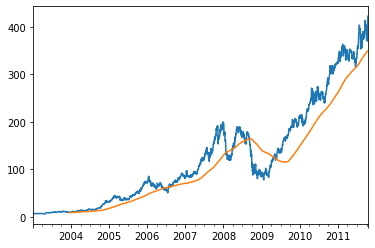

In [343]:
close['AAPL'].plot()

close['AAPL'].rolling(250).mean().plot()

In [344]:
# the value 250 that is passed in the rolling function gives us an object that enables a grouping over a 250 period
# of sliding window, so here we have a 250 day moving window average of Apple's stock price

In [345]:
# By default rolling window requires all the values to be Non-NA, but with some modification it can accept and handle
# the NA values

In [346]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [347]:
std250 = close['AAPL'].pct_change().rolling(250,min_periods=12).std()

std250.head(17)

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16         NaN
2003-01-17         NaN
2003-01-20    0.013233
2003-01-21    0.012679
2003-01-22    0.012283
2003-01-23    0.013622
2003-01-24    0.014468
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

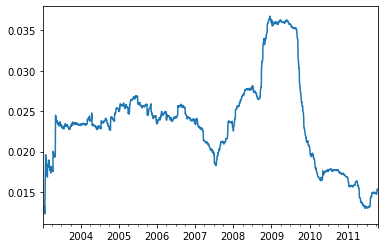

In [348]:
std250.plot()

In [349]:
# Now, if you want to compute the mean of window instead of rolling we use the expanding function

In [350]:
expandex = std250.expanding().mean()

expandex

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
                ...   
2011-10-10    0.023611
2011-10-11    0.023607
2011-10-12    0.023603
2011-10-13    0.023600
2011-10-14    0.023596
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [351]:
# Now if you call the rolling on the entire DataFrame instead of just one separated column, the rolling gets applied
# to all the columns

In [352]:
plt.style.use('grayscale')

<AxesSubplot:>

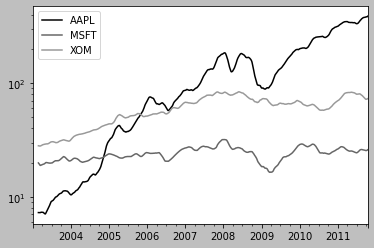

In [353]:
close.rolling(39).mean().plot(logy = True)

In [354]:
# Now, the rolling function also accepts string inputs and you can use them to calculate the mean and other data

In [355]:
close.rolling('120D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,371.166628,25.745698,76.089186
2011-10-11,372.023488,25.781860,76.060814
2011-10-12,372.834535,25.815465,76.029535
2011-10-13,373.784302,25.857209,76.008953


In [356]:
print(close_some)

              AAPL   MSFT    XOM
2003-01-02    7.40  21.11  29.22
2003-01-03    7.45  21.14  29.24
2003-01-06    7.45  21.52  29.96
2003-01-07    7.43  21.93  28.95
2003-01-08    7.28  21.31  28.83
...            ...    ...    ...
2011-10-10  388.81  26.94  76.28
2011-10-11  400.29  27.00  76.27
2011-10-12  402.19  26.96  77.16
2011-10-13  408.43  27.18  76.37
2011-10-14  422.00  27.27  78.11

[2214 rows x 3 columns]


### Exponentially weighted Functions

In [357]:
# Now one slight disadvantage with moving window functions is that the focus area is fixed
# The alternative to this is to specify constant decay factor to give more weight to recent observation
# So here we will se how to specify the decay factor using "span" and make the result comparable to moving window function
# We will also use the ewm(exponentially weighted moving) operator which adapts faster to the changes to go along with
# rolling and expanding


In [358]:
aaple_stox = close['AAPL']['2006':'2007']

aaple_stox


2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
               ...  
2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [359]:
mean_aaple = aaple_stox.rolling(30,min_periods=21).mean()

mean_aaple

2006-01-02           NaN
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06           NaN
                 ...    
2007-12-25    181.520333
2007-12-26    182.615000
2007-12-27    183.757333
2007-12-28    184.872000
2007-12-31    186.009667
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [360]:
ewma_aaple_stox = aaple_stox.ewm(span=30).mean()

ewma_aaple_stox

2006-01-02     71.890000
2006-01-03     73.367667
2006-01-04     73.937767
2006-01-05     74.059619
2006-01-06     74.569360
                 ...    
2007-12-25    184.441771
2007-12-26    185.377786
2007-12-27    186.228897
2007-12-28    187.106387
2007-12-31    187.814362
Freq: B, Name: AAPL, Length: 521, dtype: float64

<AxesSubplot:>

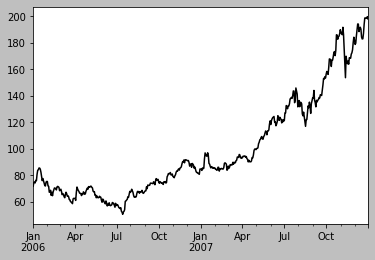

In [361]:
aaple_stox.plot(style = 'k-',label = 'Price')

<AxesSubplot:>

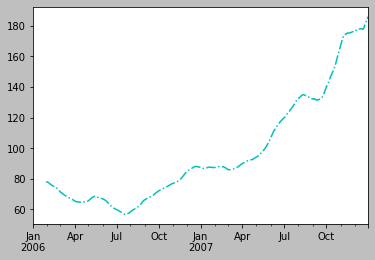

In [362]:
mean_aaple.plot(style = 'c-.',label = 'Simple Moving Average')

<AxesSubplot:>

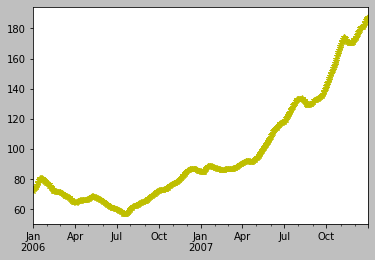

In [363]:
ewma_aaple_stox.plot(style = 'y-*',label = 'EW MA')

No handles with labels found to put in legend.


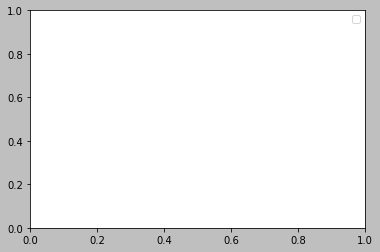

In [364]:
plt.legend()

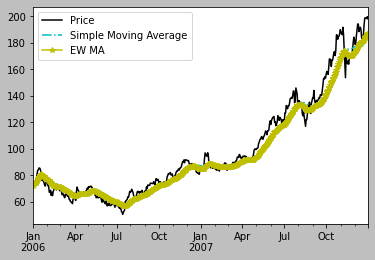

In [365]:
aaple_stox.plot(style = 'k-',label = 'Price')
mean_aaple.plot(style = 'c-.',label = 'Simple Moving Average')
ewma_aaple_stox.plot(style = 'y-*',label = 'EW MA')
plt.legend()

### Binary Moving Window Functions

In [366]:
# Now stasticals operations like covariance and correlation need to operate on two time series ex:-
# financial analysts are often interested in a stock's correlation with index like S&P 500. Now to understand all of this
# we will first start with computing the percent change for all our time series for interest

In [367]:
spx_pc = close_call['SPX']

spx_pc

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

In [368]:
spx_retrn = spx_pc.pct_change()

spx_retrn

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [369]:
total_ret = close_call.pct_change()

total_ret

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [370]:
# Now we will call rolling and then the  corr function can do the computing of the rolling correlation with spx_retrn

<AxesSubplot:>

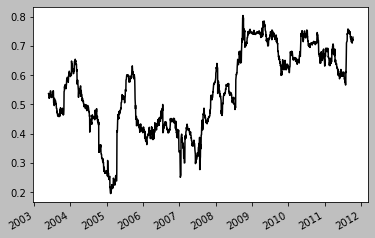

In [371]:
corr_me = total_ret['AAPL'].rolling(125,min_periods=100).corr(spx_retrn)

corr_me.plot()

In [372]:
close_call

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [373]:
# Now here we calculated the S&P 500 of just one stock, suppose you wanted to calculate for all the stocks at one shot.
# you can do this by applying the rolling function on the entire DataFrame

<AxesSubplot:>

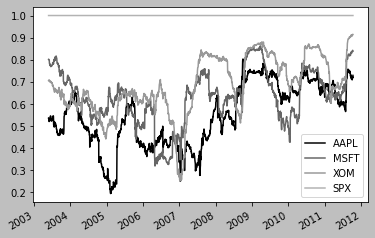

In [374]:
corr_all = total_ret.rolling(125,min_periods=100).corr(spx_retrn)

corr_all.plot()

### User-Defined Moving Window Functions

In [375]:
# Now this part is a bit of an overkill, here we will see how to use the apply function on the moving window


In [376]:
# Now the user defined function like apply only works if the value returned is single

In [377]:
# Suppose you wanted to calculate the percentile rank of a particular value

In [378]:
from scipy.stats import percentileofscore

In [379]:
def score_at_2percent(c):
    return percentileofscore(c,0.00000000000023)

<AxesSubplot:>

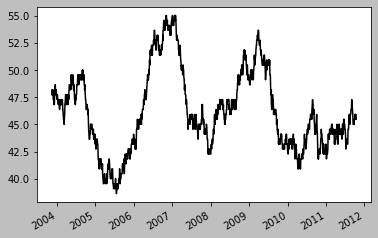

In [380]:
resalt = total_ret['AAPL'].rolling(220).apply(score_at_2percent)

resalt.plot()

## 